# Surface reconstruction
In this notebook we create a surface mesh from a 3D dataset of a Gastruloid. The used example data is a derived from [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081. Compared to the original, the dataset we use here was rescaled by factor 10 in X and Y to retrieve a small sharable file.

We will be using the napari-plugin [napari-process-points-and-surfaces](https://www.napari-hub.org/plugins/napari-process-points-and-surfaces) and the [vedo library](https://vedo.embl.es/). In case it is not installed, you need to install it first using these commands line-by-line:
```
mamba install vedo -c conda-forge
```

```
pip install napari-process-points-and-surfaces
```

In [1]:
import napari_process_points_and_surfaces as nppas

import stackview
from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import napari_simpleitk_image_processing as nsitk
import vedo
import napari
import numpy as np

In [2]:
voxel_size = [5, 3.25, 3.25]

In [3]:
image = imread("data/gastruloid_resampled.tif")
image.shape

(61, 389, 574)

## Scaling data to be isotropic
We first scale the dataset to be [isotropic](https://en.wikipedia.org/wiki/Anisotropy). This simplifies processing of the image and the surface later, because voxels have the same size in all directions.

cl.OCLArray([[[ 47.08809 ,  57.7575  ,  57.103775, ...,  55.703568,
          60.211178,  40.570713],
        [ 57.51898 ,  70.91795 ,  70.575005, ...,  69.845825,
          72.70684 ,  48.250107],
        [ 56.427963,  70.11486 ,  70.46575 , ...,  71.161125,
          70.471   ,  45.773457],
        ...,
        [ 58.234543,  72.50579 ,  73.00656 , ...,  70.48602 ,
          70.20796 ,  45.720005],
        [ 57.386467,  71.70816 ,  72.56853 , ...,  69.613235,
          69.827644,  45.6131  ],
        [ 49.9128  ,  62.509148,  63.48329 , ...,  60.638023,
          61.395153,  40.267815]],

       [[ 67.34386 ,  82.63755 ,  81.743675, ...,  79.82968 ,
          86.27632 ,  58.130062],
        [ 82.504295, 101.69503 , 101.15792 , ..., 100.31629 ,
         104.22409 ,  69.11029 ],
        [ 81.25385 , 100.839   , 101.171715, ..., 102.48402 ,
         101.07317 ,  65.52997 ],
        ...,
        [ 82.966286, 103.447365, 104.37778 , ..., 100.463615,
         100.20901 ,  65.29772 ],
        [ 82.031204, 102.48248 , 103.75897 , ...,  99.4122  ,
          99.749985,  65.16812 ],
        [ 71.601166,  89.47842 ,  90.73501 , ...,  86.79118 ,
          87.76403 ,  57.53123 ]],

       [[ 67.34386 ,  82.77347 ,  82.04068 , ...,  80.47403 ,
          86.92067 ,  58.5504  ],
        [ 83.45572 , 102.7561  , 102.03607 , ..., 101.983826,
         105.17001 ,  69.52048 ],
        [ 83.420975, 103.04767 , 102.71695 , ..., 105.27597 ,
         102.20238 ,  65.78989 ],
        ...,
        [ 81.71535 , 102.47418 , 104.244995, ...,  99.11719 ,
          99.42383 ,  64.94643 ],
        [ 81.87012 , 102.19922 , 103.65625 , ...,  98.83789 ,
          99.29785 ,  64.9082  ],
        [ 72.45442 ,  89.79169 ,  90.51242 , ...,  87.060486,
          87.6019  ,  57.301773]],

       ...,

       [[ 67.54051 ,  82.5383  ,  81.090126, ...,  80.17478 ,
          80.82371 ,  52.910885],
        [ 82.06126 , 101.22277 , 100.710526, ..., 103.39042 ,
         101.2186  ,  65.40666 ],
        [ 79.94035 , 100.00396 , 101.3679  , ..., 108.8113  ,
         102.87475 ,  65.40769 ],
        ...,
        [ 80.53962 , 101.76701 , 104.63515 , ..., 100.23504 ,
         100.606476,  65.736496],
        [ 81.66797 , 101.71686 , 102.787186, ..., 100.37282 ,
         100.2183  ,  65.33248 ],
        [ 73.59489 ,  90.01061 ,  88.89177 , ...,  88.55664 ,
          88.12098 ,  57.360264]],

       [[ 67.801025,  82.45273 ,  80.53387 , ...,  80.59008 ,
          83.41242 ,  55.222736],
        [ 82.24752 , 100.807014,  99.511765, ..., 101.985435,
         103.01694 ,  67.498184],
        [ 80.00328 ,  99.313545,  99.70718 , ..., 104.945656,
         102.82331 ,  66.467674],
        ...,
        [ 81.12859 , 102.16841 , 104.58116 , ...,  99.4958  ,
         100.16885 ,  65.53749 ],
        [ 81.66797 , 101.54877 , 102.42766 , ..., 101.4514  ,
         100.686   ,  65.46244 ],
        [ 72.74163 ,  89.10377 ,  88.25697 , ...,  91.12329 ,
          89.3933  ,  57.81918 ]],

       [[ 61.091667,  74.02058 ,  71.97738 , ...,  72.68682 ,
          76.6966  ,  51.182148],
        [ 74.02058 ,  90.28683 ,  88.59206 , ...,  90.67463 ,
          93.77397 ,  62.061447],
        [ 71.92062 ,  88.75876 ,  88.45431 , ...,  91.6653  ,
          92.345436,  60.435963],
        ...,
        [ 73.28843 ,  92.06418 ,  93.92302 , ...,  88.88938 ,
          89.698654,  58.746372],
        [ 73.373566,  91.121216,  91.781006, ...,  91.87927 ,
          90.77728 ,  58.902054],
        [ 64.7751  ,  79.43912 ,  78.86284 , ...,  83.60936 ,
          81.17723 ,  52.258175]]], dtype=float32)
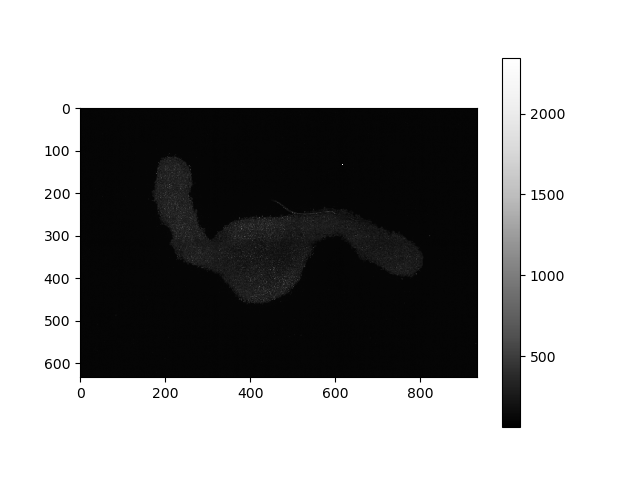
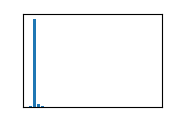

In [4]:
zoom = 2

scaled = cle.scale(image, 
                   factor_x=voxel_size[2] / zoom,
                   factor_y=voxel_size[1] / zoom,
                   factor_z=voxel_size[0] / zoom,
                   auto_size=True,
                   linear_interpolation=True
                  )
scaled

## Binarization
We then turn the dataset into a binary image to turn it into a surface afterwards.

StackViewNDArray([[[68.17181 , 69.31017 , 70.42985 , ..., 66.61733 ,
                    64.83193 , 62.98935 ],
                   [69.266685, 70.42774 , 71.570076, ..., 67.626884,
                    65.786   , 63.887787],
                   [70.344154, 71.52635 , 72.68981 , ..., 68.60931 ,
                    66.713425, 64.76011 ],
                   ...,
                   [72.90895 , 74.163704, 75.38663 , ..., 69.76634 ,
                    67.6335  , 65.44753 ],
                   [72.24142 , 73.50128 , 74.72986 , ..., 68.95489 ,
                    66.84921 , 64.69189 ],
                   [71.556404, 72.82229 , 74.05763 , ..., 68.13313 ,
                    66.055244, 63.927197]],

                  [[70.09322 , 71.26194 , 72.4123  , ..., 68.50461 ,
                    66.6585  , 64.753654],
                   [71.22678 , 72.41859 , 73.591805, ..., 69.54673 ,
                    67.64431 , 65.68292 ],
                   [72.34235 , 73.55571 , 74.75033 , ..., 70.5611  ,
                    68.60285 , 66.58552 ],
                   ...,
                   [74.95873 , 76.24825 , 77.50358 , ..., 71.766685,
                    69.562355, 67.30484 ],
                   [74.27799 , 75.57094 , 76.829895, ..., 70.946144,
                    68.76893 , 66.5401  ],
                   [73.57967 , 74.876785, 76.14036 , ..., 70.115135,
                    67.96568 , 65.76625 ]],

                  [[71.9724  , 73.17097 , 74.35156 , ..., 70.34086 ,
                    68.433784, 66.46648 ],
                   [73.144394, 74.36633 , 75.569954, ..., 71.41631 ,
                    69.45234 , 67.42788 ],
                   [74.29795 , 75.5418  , 76.766975, ..., 72.46353 ,
                    70.443184, 68.36217 ],
                   ...,
                   [76.962494, 78.28569 , 79.57246 , ..., 73.72628 ,
                    71.45177 , 69.124176],
                   [76.268135, 77.593   , 78.8814  , ..., 72.89748 ,
                    70.649994, 68.351135],
                   [75.556076, 76.88323 , 78.17407 , ..., 72.05811 ,
                    69.83838 , 67.568954]],

                  ...,

                  [[77.704025, 78.96229 , 80.20798 , ..., 75.34696 ,
                    73.107895, 70.81594 ],
                   [79.02286 , 80.3115  , 81.585846, ..., 76.63439 ,
                    74.34556 , 72.003105],
                   [80.3268  , 81.64365 , 82.944435, ..., 77.895226,
                    75.557045, 73.164566],
                   ...,
                   [83.40741 , 84.79011 , 86.133224, ..., 80.28938 ,
                    77.82327 , 75.30162 ],
                   [82.68302 , 84.045975, 85.36895 , ..., 79.49748 ,
                    77.05579 , 74.5579  ],
                   [81.934494, 83.27894 , 84.583   , ..., 78.69578 ,
                    76.27852 , 73.804146]],

                  [[77.139046, 78.37909 , 79.605865, ..., 74.82057 ,
                    72.62191 , 70.37005 ],
                   [78.43794 , 79.708664, 80.964355, ..., 76.08622 ,
                    73.83583 , 71.53167 ],
                   [79.72185 , 81.02101 , 82.30332 , ..., 77.325645,
                    75.02388 , 72.667816],
                   ...,
                   [82.63944 , 84.01173 , 85.344154, ..., 79.6806  ,
                    77.2359  , 74.73627 ],
                   [81.918396, 83.26966 , 84.58061 , ..., 78.892426,
                    76.47029 , 73.99257 ],
                   [81.17345 , 82.504944, 83.795616, ..., 78.094284,
                    75.6949  , 73.23901 ]],

                  [[76.55771 , 77.77924 , 78.98691 , ..., 74.27832 ,
                    72.1207  , 69.90959 ],
                   [77.83754 , 79.09004 , 80.32681 , ..., 75.52266 ,
                    73.31139 , 71.04623 ],
                   [79.102234, 80.38339 , 81.64694 , ..., 76.74116 ,
                    74.47652 , 72.157585],
                   ...,
                   [81.85365 , 83.21598 , 84.53835 , ..., 79.061874,
                    76.63943 , 74.162575],
              
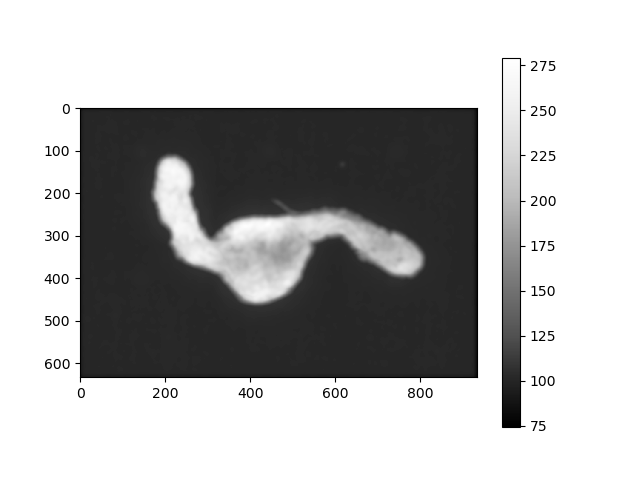
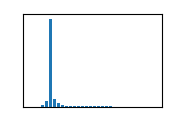

In [5]:
sigma = 5
blurred = np.asarray(cle.gaussian_blur(scaled, 
                            sigma_x=sigma,
                            sigma_y=sigma,
                            sigma_z=sigma,
                           ))
stackview.insight(blurred)

In [6]:
binary = blurred > blurred.max() * 0.5
binary[75]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In case the object has inner holes, we should fill them to prevent inner surfaces being generated.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
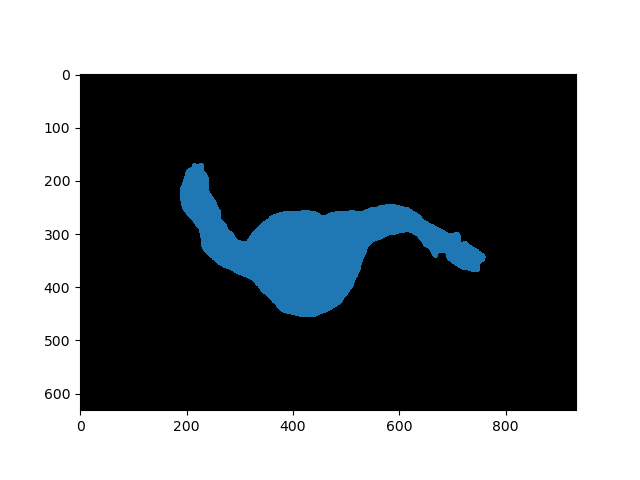

In [7]:
binary_filled = nsitk.binary_fill_holes(binary)
binary_filled[75]

## Generating surface meshes
We first generate a surface from the binary image.

In [8]:
surface = nppas.all_labels_to_surface(binary_filled)

(array([[ 12.5, 219. , 224. ],
        [ 13. , 219. , 223.5],
        [ 13. , 218.5, 224. ],
        ...,
        [113.5, 354. , 425. ],
        [113.5, 354. , 426. ],
        [113.5, 354. , 427. ]], dtype=float32),
 array([[     0,      1,      2],
        [     0,      3,      4],
        [     2,      3,      0],
        ...,
        [330646, 330774, 330644],
        [330775, 330774, 330646],
        [330619, 330775, 330646]], dtype=int64))
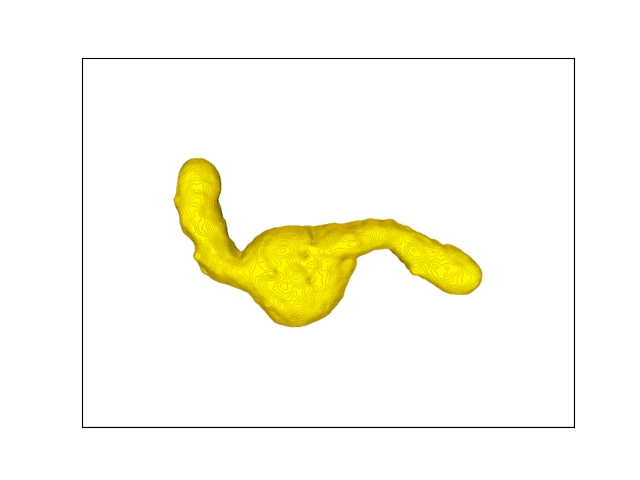

In [9]:
surface

As `> 100000` faces are a bit heavy, we simplify the mesh.

(array([[ 14.423445, 142.66914 , 215.32169 ],
        [ 14.810961, 139.17763 , 228.27548 ],
        [ 14.162283, 148.2046  , 227.33974 ],
        ...,
        [111.6466  , 361.66382 , 424.89847 ],
        [112.93311 , 350.68716 , 417.2523  ],
        [113.510216, 351.49545 , 429.21454 ]], dtype=float32),
 array([[   0,    1,    2],
        [   2,    3,    0],
        [   0,    3,    4],
        ...,
        [3309, 3308, 3299],
        [3306, 3307, 3308],
        [3307, 3299, 3308]], dtype=int64))
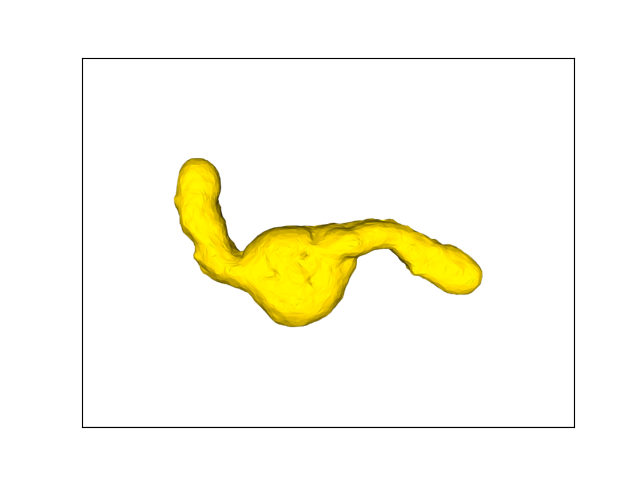

In [10]:
simplified_surface = nppas.decimate_quadric(surface, fraction=0.01)
simplified_surface

(array([[ 14.033925, 143.77332 , 216.6745  ],
        [ 15.129558, 142.37831 , 223.03673 ],
        [ 14.461084, 150.43857 , 219.48332 ],
        ...,
        [111.69804 , 357.87436 , 426.4057  ],
        [113.048996, 350.83694 , 417.0863  ],
        [113.62746 , 351.64713 , 429.07654 ]], dtype=float32),
 array([[   0,    1,    2],
        [   2,    3,    0],
        [   0,    3,    4],
        ...,
        [3309, 3308, 3299],
        [3306, 3307, 3308],
        [3307, 3299, 3308]], dtype=int64))
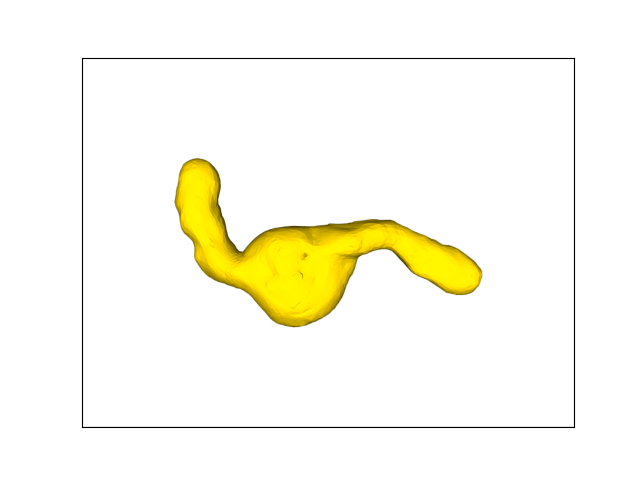

In [11]:
smoothed_surface = nppas.smooth_surface(simplified_surface)
smoothed_surface

## Saving surface meshes to disk

In [12]:
mesh = nppas.to_vedo_mesh(smoothed_surface)

filename = "data/gastruloid.ply"

_ = vedo.write(mesh, filename)

## Loading surface meshes from disk

In [13]:
new_mesh = vedo.load(filename)

(array([[ 14.033925, 143.77332 , 216.6745  ],
        [ 15.129558, 142.37831 , 223.03673 ],
        [ 14.461084, 150.43857 , 219.48332 ],
        ...,
        [111.69804 , 357.87436 , 426.4057  ],
        [113.048996, 350.83694 , 417.0863  ],
        [113.62746 , 351.64713 , 429.07654 ]], dtype=float32),
 array([[   0,    1,    2],
        [   2,    3,    0],
        [   0,    3,    4],
        ...,
        [3309, 3308, 3299],
        [3306, 3307, 3308],
        [3307, 3299, 3308]], dtype=int64))
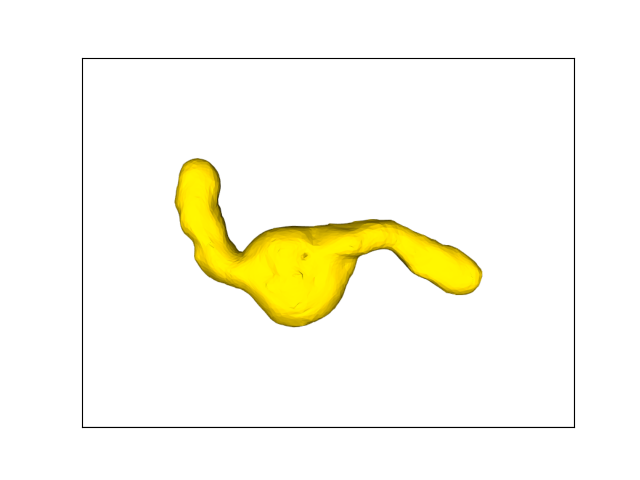

In [14]:
new_surface = nppas.to_napari_surface_data(new_mesh)
new_surface

## Visualizing raw data and surface meshes in Napari
To interact with the data, we need a 3D viewer such as Napari.

In [15]:
viewer = napari.Viewer(ndisplay=3)

In [16]:
viewer.add_image(image, scale=voxel_size)
viewer.add_image(blurred, scale=[zoom, zoom, zoom])

<Image layer 'blurred' at 0x28e90889eb0>

In [17]:
viewer.add_labels(binary, scale=[zoom, zoom, zoom])

<Labels layer 'binary' at 0x28e8f06b0d0>

In [18]:
viewer.add_surface(surface, scale=[zoom, zoom, zoom])
viewer.add_surface(simplified_surface, scale=[zoom, zoom, zoom])
viewer.add_surface(smoothed_surface, scale=[zoom, zoom, zoom])

<Surface layer 'smoothed_surface' at 0x28e91018910>

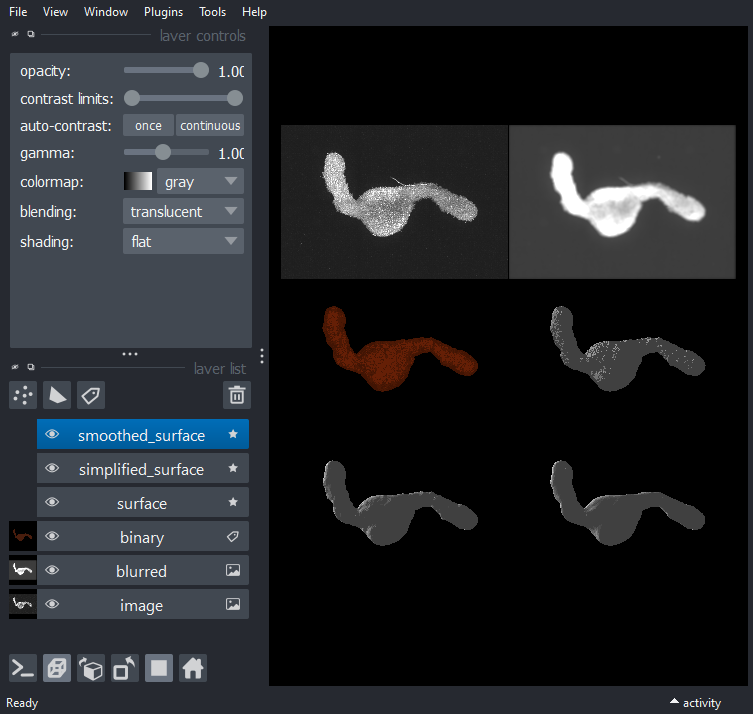

In [19]:
viewer.grid.stride = -1
viewer.grid.shape = [3,2]
viewer.grid.enabled = True
napari.utils.nbscreenshot(viewer)

In [20]:
viewer = napari.Viewer(ndisplay=3)

viewer.add_surface(simplified_surface)

<Surface layer 'simplified_surface' at 0x28e84f76550>

## Exercise
Open napari, load the scaled dataset and apply the steps above manually from the `Tools` menu.